# Task One

## Thematic Analysis for Product Improvement
Analyse the reviews to identify common themes.
### Process
• Identify recurring themes in the reviews and categorise them using the below two approaches.
1. Analyse the most common or frequent words in the reviews to gain quick insights into
frequent topics or concerns highlighted by the customers.
2. Utilise topic modelling methodologies, such as Latent Dirichlet Allocation (LDA), which
systematically identifies and classifies underlying topics within the textual content.
• Evaluate both methodologies to determine the most suitable approach for this project, and
justify the selection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.models.phrases import Phrases, Phraser
from gensim import corpora
from pprint import pprint

In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Asus
[nltk_data]     ExpertBook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Asus
[nltk_data]     ExpertBook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load dataset
data = pd.read_csv('Amazon_Reviews_Dataset.csv')

In [5]:
data


,product name,ratings,reviews,date
0,Nautica Voyage By Nautica For Men. Eau De Toil...,4,\n\n This product exceeded my expectations! I...,"July 13, 2018"
1,Nautica Voyage By Nautica For Men. Eau De Toil...,5,\n\n This is a terrible knock off. When I ju...,"June 27, 2018"
2,Nautica Voyage By Nautica For Men. Eau De Toil...,1,"\n\n That's right, it smells kind of like a b...","October 5, 2017"
3,Nautica Voyage By Nautica For Men. Eau De Toil...,5,\n\n I was told by a friend this Cologne sme...,"November 24, 2015"
4,Nautica Voyage By Nautica For Men. Eau De Toil...,1,\n\n So originally i felt sketchy on ordering...,"July 19, 2018"
...,...,...,...,...
34995,Becoming,5,\n\n My wife loved reading it.\n\n,26-Dec-18
34996,Becoming,5,\n\n I don’t normally read autobiographies bu...,6-Apr-19
34997,Becoming,4,"\n\n I purchase this book for my mother, she ...",4-Jan-20
34998,Becoming,5,\n\n So glad I purchased. What a wonderful hu...,27-Dec-18


In [4]:
def preprocess_text(text_data):
    """
    Preprocesses text data by converting to lowercase, removing stop words, and tokenizing the words.

    Parameters:
    - text_data: pandas Series containing text data to be preprocessed

    Returns:
    - preprocessed_text: list of preprocessed text documents
    """
    stop_words = set(stopwords.words('english'))
    preprocessed_text = text_data.apply(lambda x: ' '.join([word for word in word_tokenize(str(x).lower()) if word.isalnum() and word not in stop_words]))
    return preprocessed_text

In [5]:
def perform_lda_analysis(text_data, num_topics=5):
    """
    Performs LDA-based thematic analysis on text data.

    Parameters:
    - text_data: pandas Series containing preprocessed text data
    - num_topics: number of topics for LDA model (default is 5)

    Returns:
    - lda_model: trained LDA model
    - coherence_score: coherence score of the model
    """
    # Tokenize words and build bigrams
    documents = text_data.apply(word_tokenize)
    bigram = Phrases(documents, min_count=5)
    bigram_phraser = Phraser(bigram)
    documents = [bigram_phraser[doc] for doc in documents]

    # Create dictionary and corpus
    dictionary = Dictionary(documents)
    corpus = [dictionary.doc2bow(doc) for doc in documents]

    # Build LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

    # Print topics
    pprint(lda_model.print_topics())

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()

    return lda_model, coherence_score

In [6]:
def visualize_topics(lda_model, num_topics=5):
    """
    Visualizes the topics generated by the LDA model.

    Parameters:
    - lda_model: trained LDA model
    - num_topics: number of topics (default is 5)
    """
    topics = lda_model.show_topics(formatted=False)
    fig, axes = plt.subplots(1, num_topics, figsize=(15, 5), sharex=True, sharey=True)
    for i, (topic, ax) in enumerate(zip(topics, axes.flatten())):
        topic_words = dict(topic[1])
        sns.barplot(x=list(topic_words.values()), y=list(topic_words.keys()), ax=ax)
        ax.set_title(f'Topic {i+1}')
        ax.set_xlabel('Word Probability')
    plt.tight_layout()
    plt.show()

In [8]:
# Check column names
print(data.columns)

Index(['product name', 'ratings', 'reviews', 'date'], dtype='object')


In [9]:
preprocessed_text = preprocess_text(data['reviews'])

In [13]:
# Tokenize words and build bigrams
documents = preprocessed_text.apply(word_tokenize)
bigram = Phrases(documents, min_count=5)
bigram_phraser = Phraser(bigram)
documents = [bigram_phraser[doc] for doc in documents]

In [14]:
from collections import Counter

# Analyze most common words
word_counts = Counter([word for doc in documents for word in doc])
most_common_words = word_counts.most_common(10)
print("Most common words:", most_common_words)

Most common words: [('great', 7323), ('one', 6902), ('like', 5955), ('love', 5934), ('good', 5385), ('alexa', 4950), ('product', 4178), ('book', 4111), ('get', 3649), ('would', 3581)]


In [10]:
# Perform LDA analysis
lda_model, coherence_score = perform_lda_analysis(preprocessed_text)

[(0,
  '0.017*"one" + 0.015*"product" + 0.011*"time" + 0.010*"great" + '
  '0.008*"would" + 0.008*"amazon" + 0.008*"first" + 0.007*"get" + 0.007*"set" '
  '+ 0.007*"got"'),
 (1,
  '0.020*"alexa" + 0.011*"like" + 0.010*"one" + 0.010*"love" + 0.009*"use" + '
  '0.009*"echo_dot" + 0.008*"also" + 0.008*"music" + 0.007*"loved" + '
  '0.007*"echo"'),
 (2,
  '0.055*"book" + 0.025*"read" + 0.018*"life" + 0.018*"michelle_obama" + '
  '0.015*"michelle" + 0.014*"story" + 0.012*"family" + 0.011*"obama" + '
  '0.010*"first_lady" + 0.008*"love"'),
 (3,
  '0.044*"great" + 0.041*"good" + 0.038*"love" + 0.032*"product" + '
  '0.020*"like" + 0.018*"taste" + 0.018*"price" + 0.014*"flavor" + '
  '0.011*"drink" + 0.010*"bottle"'),
 (4,
  '0.010*"good" + 0.010*"like" + 0.009*"nice" + 0.008*"would" + 0.008*"well" + '
  '0.007*"masks" + 0.007*"one" + 0.007*"mask" + 0.006*"big" + 0.006*"great"')]


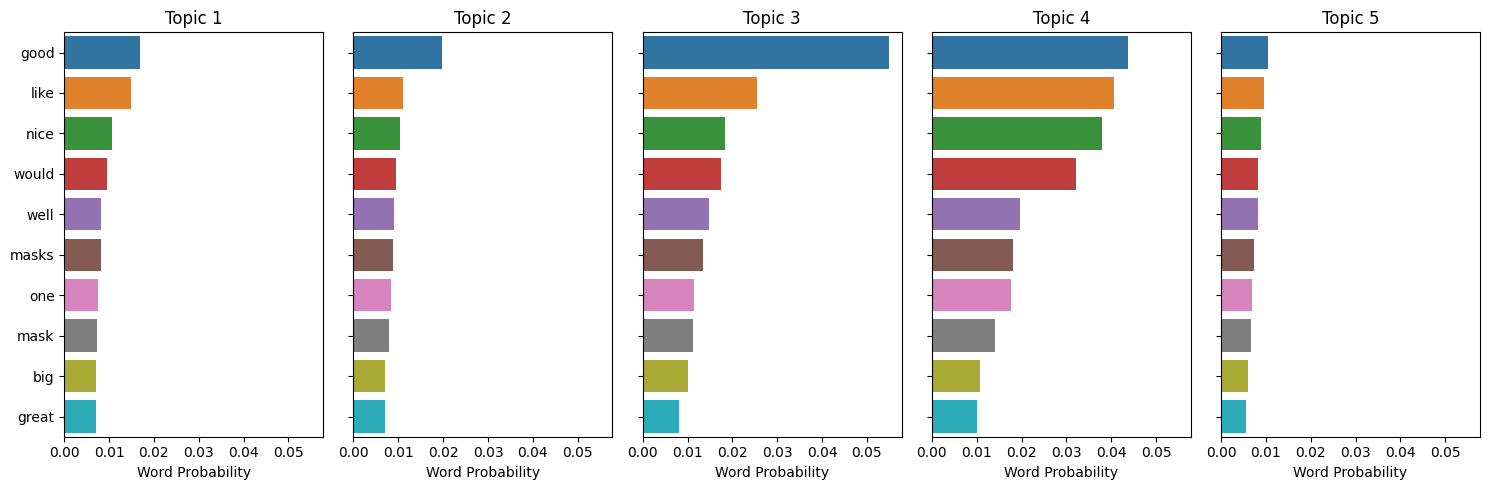

In [11]:
# Visualize topics
visualize_topics(lda_model)

# Task Two

## Sentiment Analysis
Develop an NLP model to categorise reviews into sentiments.

### Process

- Preprocess the data, removing any irrelevant information or noise.
- Train a sentiment analysis model using an appropriate NLP library.
- Validate the model with a separate test set and document its performance.
- Conduct a statistical analysis to present the distribution of sentiments (positive, negative, neutral) across various products and previously identified themes.
- Examine the relationship between the customer ratings and the sentiments extracted through sentiment analysis to distinguish any patterns or discrepancies.repancies.

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
def preprocess_text(text):
    """
    Preprocesses the text by removing stopwords, tokenizing, and converting to lowercase.

    Parameters:
    - text: str, input text to be preprocessed

    Returns:
    - clean_text: str, preprocessed text
    """
    # Initialize lemmatizer and get the list of stopwords
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    # Tokenize and preprocess (lemmatize) the text
    tokens = word_tokenize(text.lower())
    clean_text = ' '.join([lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words])
    return clean_text


In [16]:
def train_sentiment_analysis_model(X_train, y_train):
    """
    Trains a sentiment analysis model using Support Vector Machine classifier.

    Parameters:
    - X_train: array-like, features for training
    - y_train: array-like, target labels for training

    Returns:
    - model: trained sentiment analysis model
    """
    model_pipeline = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))
    model_pipeline.fit(X_train, y_train)
    return model_pipeline

In [7]:
def validate_model(model, X_test, y_test):
    """
    Validates the sentiment analysis model using a separate test set.

    Parameters:
    - model: trained sentiment analysis model
    - X_test: array-like, features for testing
    - y_test: array-like, target labels for testing

    Returns:
    - accuracy: float, accuracy score of the model
    - classification_report: str, classification report of the model
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

In [27]:
def sentiment_analysis(review_text):
    """
    Performs sentiment analysis on review text using the trained model.

    Parameters:
    - review_text: str, review text to analyze

    Returns:
    - sentiment: str, predicted sentiment label (e.g., 'very positive', 'positive', 'neutral', 'negative', 'very negative')
    """
    # sentiment_labels = {0: 'very negative', 1: 'negative', 2: 'somewhat negative', 3: 'neutral', 4: 'positive', 5: 'very positive'}
    cleaned_text = preprocess_text(review_text)
    prediction = model_pipeline.predict([cleaned_text])[0]
    return prediction # Return 'Unknown' if prediction is not in the sentiment_labels dictionary

In [18]:
def map_ratings_to_labels(rating):
    """
    Maps numerical ratings to sentiment labels.

    Parameters:
    - rating: int, the numerical rating

    Returns:
    - label: str, the sentiment label
    """
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating >= 4:
        return 'positive'




In [10]:
# Load dataset
data = pd.read_csv('Amazon_Reviews_Dataset.csv')

In [11]:
# Preprocess text data
data['clean_text'] = data['reviews'].apply(preprocess_text)


In [12]:
# Apply the mapping to your dataset
data['sentiment_label'] = data['ratings'].apply(map_ratings_to_labels)

In [13]:
# Split data9iy76t3wq212w3 into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['sentiment_label'], test_size=0.2, random_state=42)


In [19]:
# Train sentiment analysis model
model_pipeline = train_sentiment_analysis_model(X_train, y_train)

In [20]:
# Validate the model
accuracy, report = validate_model(model_pipeline, X_test, y_test)
print("Model Accuracy:", accuracy)
print("Classification Report:")
print(report)

C:\Users\Asus ExpertBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus ExpertBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Accuracy: 0.798
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       951
     neutral       0.00      0.00      0.00       462
    positive       0.80      1.00      0.89      5587

    accuracy                           0.80      7000
   macro avg       0.27      0.33      0.30      7000
weighted avg       0.64      0.80      0.71      7000



C:\Users\Asus ExpertBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Example of sentiment analysis
review_text = "This product is baad!"
sentiment = sentiment_analysis(review_text)
print("Sentiment:", sentiment)

Sentiment: Unknown


In [32]:
# Example of sentiment analysis
review_text = "This product is !"
sentiment = sentiment_analysis(review_text)
print("Sentiment:", sentiment)

Sentiment: positive


In [33]:
# Common questions and associated keywords for each topic
common_questions = {
    "product_experience": ["product", "experience", "quality", "time", "great", "amazon", "set"],
    "alexa_devices": ["alexa", "echo", "echo_dot", "music", "device", "use", "loved"],
    "book_reviews": ["book", "read", "story", "michelle_obama", "life", "family", "first_lady"],
    "product_appreciation": ["great", "good", "love", "like", "price", "flavor", "bottle"],
    "positive_feedback": ["good", "like", "nice", "great", "well", "masks", "mask", "big"]
}

In [34]:
import re

def search_reviews(question, reviews):
    relevant_sentences = []
    for review in reviews:
        for sentence in review.split("."):
            if re.search(r'\b(?:{})\b'.format('|'.join(common_questions[question])), sentence.lower()):
                relevant_sentences.append(sentence.strip())
    return relevant_sentences


In [35]:
def qa_system(reviews):
    answers = {}
    for question in common_questions:
        answers[question] = search_reviews(question, reviews)
    return answers


In [37]:
qa_system("What are customers saying about the product?")

{'durability': [], 'scent': []}

In [38]:
# Example test data (you can replace it with your actual test data)
test_reviews = [
    "The product durability is excellent. It has lasted for a long time without any issues.",
    "I love using my Alexa device. It's great for playing music and controlling smart devices.",
    "Michelle Obama's book 'Becoming' is a captivating story of her life and journey.",
    "I'm very satisfied with the quality of the product. It's well worth the price.",
    "The masks are very comfortable to wear and provide good protection."
]


In [39]:

# Call the qa_system function to retrieve relevant sentences for each question
answers = qa_system(test_reviews)



In [40]:
# Print the retrieved sentences for each question
for question, sentences in answers.items():
    print(f"Question: {question}")
    print("Relevant Sentences:")
    for sentence in sentences:
        print("-", sentence)
    print()


Question: durability
Relevant Sentences:
- The product durability is excellent
- I'm very satisfied with the quality of the product

Question: scent
Relevant Sentences:

